# Virtual Pruning

## Importing the digitized structure

In [1]:
from openalea.mtg import *
import numpy as np
from importlib import reload
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()


In [2]:
from matplotlib.pyplot import *
import mtgplot as mp

In [3]:
sw = mp.plot_tree(g)
sw

SceneWidget(scenes=[{'id': '37kcfxQ0SLkomwX2W2vDneB0r', 'data': b'x\xda\xac\x9d\tx\x13\xd5\xda\xf8\xd3%-\x86BY…

## Pruning procedure

To select a pruning point, we start from terminal points, trace back into the structure up to 3 layers. We check if the pruning point is valid by looking the depth of what it carries. If it is in average close to what is intended we select it. Else we select another one.

Point d'amélioration : tailler en fait au milieu de la n4.

In [3]:
import pruning ; reload(pruning)
from pruning import *

## Caracterizing cut

### We calculate the mean number of terminal GUs according to pruning severity

In [4]:
def nbterminals(mtg, listcutids):
    nb_term = [len(get_terminal_gus_from_ancestor(mtg, vid)) for vid in listcutids]
    return (round(np.mean(nb_term),2), round(np.std(nb_term),2))

### We calculate the number of leaves above the pruning point according to pruning severity

In [5]:
def nbleaves_prunedGU(mtg, listcutids):
    d = [sum([get_gu_nb_leaf(mtg, lvid) for lvid in get_descendants_gus_from_ancestor(mtg, vid) if lvid != vid]) for vid in listcutids]
    return (round(np.mean(d)),round(np.std(d)))

### calculation of leaf area from diameter

In [6]:
def leafarea(mtg,listcutids):
    leaf_area = [gu_leaf_area(get_gu_diameter(mtg, vid)) for vid in listcutids]
    #leaf_area = [gu_leaf_area(get_gu_section(mtg, vid)) for vid in listcutids]
    return ((np.mean(leaf_area)),(np.std(leaf_area)))    


# Vegetative growth after pruning

In [10]:
pruned = prune(g, 60)

In [11]:
intensity = continuous_intensity_from_pruned(pruned)
print(intensity, intensity_level(intensity))

0.1583723645732292 T1


In [12]:
prunedrepr = mp.representation(pruned, wood = False, leaves=True)

In [13]:
import lightestimation; reload(lightestimation)
from lightestimation import *

In [14]:
TrPPFD_min, Zeta_min, Zeta_12H = light_variables(prunedrepr)

In [15]:
TrPPFD_min, Zeta_min, Zeta_12H

(27       0.049382
 28       0.036883
 31       0.082002
 32       0.047476
 35       0.057354
            ...   
 16721    0.018951
 16724    0.015494
 16727    0.049307
 16730    0.024309
 16731    0.054868
 Length: 4373, dtype: float64,
 27       0.627387
 28       0.542869
 31       0.783639
 32       0.615640
 35       0.672813
            ...   
 16721    0.378398
 16724    0.337249
 16727    0.626931
 16730    0.434829
 16731    0.659250
 Length: 4373, dtype: float64,
 27       0.643904
 28       0.544073
 31            NaN
 32       0.678306
 35            NaN
            ...   
 16721    0.406395
 16724    0.373216
 16727    0.738741
 16730    0.470146
 16731    0.762690
 Name: 12H, Length: 4373, dtype: float64)

In [16]:
sum(Zeta_min == np.nan)

0

<AxesSubplot:>

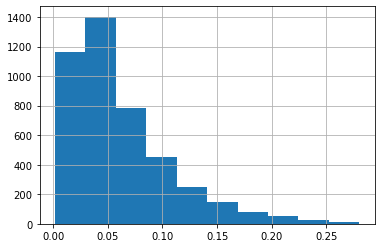

In [17]:
TrPPFD_min.hist()

<AxesSubplot:>

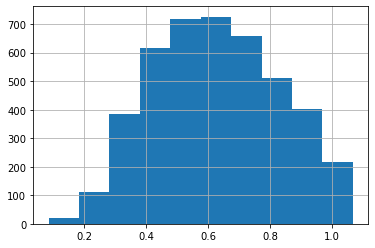

In [18]:
Zeta_min.hist()

<AxesSubplot:>

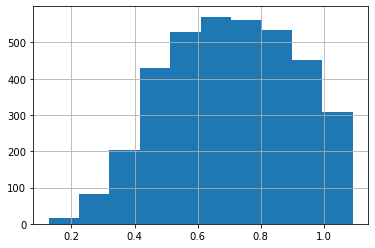

In [19]:
Zeta_12H.hist()

In [20]:
mp.plot_projection(prunedrepr, Zeta_12H)

SceneWidget(scenes=[{'id': 'GL5wTqK5KkQ2fYGcK0Q2LsLAs', 'data': b'x\xda\x94\xdd\x07\\\xd4\xc8\x1e\x07p\xec\xd8…

In [7]:
import regrowth_base; reload(regrowth_base)
from regrowth_base import plot_growth
import regrowth_emma; reload(regrowth_emma)
from regrowth_emma import *

In [8]:

regrowth, newids = growth(pruned, TrPPFD_min, Zeta_min, Zeta_12H)

print('Created', len(newids), 'new GUs')
plot_growth(regrowth, newids, leaves=True, gc=True)

NameError: name 'pruned' is not defined

In [79]:
def date_histo(g):
    from matplotlib.pyplot import hist, show
    from collections import Counter
    from datetime import timedelta
    c = list(Counter(g.property('BurstDate').values()).items())
    c.sort(key = lambda v : v[0])
    mindate = c[0][0]
    maxdate = c[-1][0]
    c = dict(c)
    r = range(0,(maxdate-mindate).days)
    d = [mindate+timedelta(days=d) for d in r]
    v = [ c.get(di,0) for di in d]
    bar(r,v)
    xticks(r,d, rotation=90)
    show()

[(datetime.date(2021, 2, 16), 1), (datetime.date(2021, 2, 17), 8), (datetime.date(2021, 2, 18), 14), (datetime.date(2021, 2, 19), 37), (datetime.date(2021, 2, 20), 65), (datetime.date(2021, 2, 21), 133), (datetime.date(2021, 2, 22), 157), (datetime.date(2021, 2, 23), 201), (datetime.date(2021, 2, 24), 193), (datetime.date(2021, 2, 25), 217), (datetime.date(2021, 2, 26), 198), (datetime.date(2021, 2, 27), 225), (datetime.date(2021, 2, 28), 155), (datetime.date(2021, 3, 1), 101), (datetime.date(2021, 3, 2), 54), (datetime.date(2021, 3, 3), 32), (datetime.date(2021, 3, 4), 13), (datetime.date(2021, 3, 5), 3), (datetime.date(2021, 3, 6), 3), (datetime.date(2021, 3, 11), 10), (datetime.date(2021, 3, 12), 50), (datetime.date(2021, 3, 13), 64)]


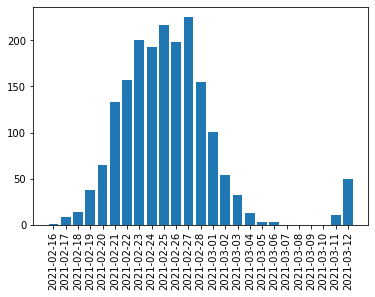

In [81]:
date_histo(regrowth)

In [84]:
def nb_children_histo(g):
    def severity(vid):
        return g.property('cuted').get(vid,0)

    ancestors = [get_parent(g,vid) if vid in g.property('BurstDate') else vid for vid in get_all_terminal_gus(g) ]
    ancestors = set(ancestors)
    
    values = [[] for i in range(4)]
    for vid in ancestors:
        values[severity(vid)].append(g.nb_children(vid))
    figure(figsize=(18,4))
    for order, v in enumerate(values):
        if len(v) > 0:
            subplot(220+order+1)
            hist(v, bins=np.arange(0,max(1,max(v)))-0.5)
            print(len(v),(np.mean(v), np.std(v)),(np.mean([vi for vi in v if vi > 0]), np.std([vi for vi in v if vi > 0])),(np.min(v), np.max(v)))
    show()
    

2950 (0.655593220338983, 1.2782512832009532) (2.254079254079254, 1.4194005114486217) (0, 9)


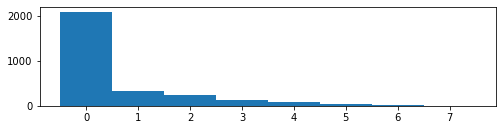

In [85]:
nb_children_histo(regrowth)

Les **longueurs d'UCs générées** suivent la loi normale du modèle précédent. A corriger avec données 2017

# leaf area produced at the tree scale vs. leaf area removed by pruning

In [ ]:
def leaf_area_produced(mtg,newids):
    newids = growth(t3, listidprunedT3, T3)
    totalleafarea = sum([individual_leafarea_unpruned() for vid in newids])
    growth(t3, listidprunedT3, T3)
    return totalleafarea

# améliorations possibles du modèle

In [9]:
def simulation(mtg, nbcuts):
    from allometry import gu_leaf_area
    # characterize before pruning
    # nb of terminal units
    nbterminalunits = len(get_all_terminal_gus(mtg))

    # determine pruning
    listidpruned = define_pruning(mtg, nbcuts, None)
    #pruningprop = tag_pruning(mtg, listidpruned)

    # characterize pruning
    # - intensity
    intensity = intensity_level(continuous_intensity(g,listidpruned))
    if intensity == T2:
        raise ValueError('Intensity', intensity)
        
    #  - nb of terminal units
    nbremovedGU = sum([sum([len(get_descendants_gus_from_ancestor(mtg, vid))-1 for vid in pruneds]) for order, pruneds in listidpruned.items()])
    
    # - surface foliaire retire 
    removed_leaf_area = sum([sum([gu_leaf_area(get_gu_diameter(mtg, vid)) for vid in pruneds]) for order, pruneds in listidpruned.items()])
    
    # apply pruning
    prunedmtg = apply_pruning(mtg, listidpruned)
    
    prunedrepr = mp.representation(pruned, wood = False, leaves=True)
    TrPPFD_min, Zeta_min, Zeta_12H = light_variables(prunedrepr)

    # characterize pruning
    # nb of terminal units
    
    # apply growth    
    growthmtg, newGUs = growth(prunedmtg, TrPPFD_min, Zeta_min, Zeta_12H)

    allpruned = pruned

    # characterize growth
    nbgeneratedGU = len(newGUs)
    generated_leaf_area_pruned = sum([la for vid,la in growthmtg.property('RegeneratedLeafArea').items() if vid in allpruned])
    generated_leaf_area_unpruned = sum([la for vid,la in growthmtg.property('RegeneratedLeafArea').items() if not (vid in allpruned)])
    
    return (nbterminalunits, nbremovedGU, nbgeneratedGU), (removed_leaf_area, generated_leaf_area_pruned, generated_leaf_area_unpruned)
    

In [98]:
units0, la0 = simulation(g, 0)
print(units0, la0)

Should examine 3228 terminal GUs.
Processed 0 pruned terminal GU and 3187 unpruned terminal GU and  41 ignored.
(3228, 0, 952) (0, 1395.6421663341366, 5.800077125903842)


In [99]:
units20, la20 = simulation(g, 20)
print(units20, la20)

Should examine 3146 terminal GUs.
Processed 60 pruned terminal GU and 3046 unpruned terminal GU and  40 ignored.
(3228, 227, 1261) (648.9834329171969, 2295.132617194506, 34.913519845552386)


In [ ]:
units60, la60 = simulation(g, 60)
print(units60, la60)

In [ ]:
#units0060, la0060 = pipeline(g, (0,30,76))
#print(units0060, la0060)

In [ ]:
print(la0[1]-la0[0])
print(la20[1]-la20[0])
print(la60[1]-la60[0])


In [100]:
def process_range(mtg, cutrange = (0,20), cuttype = (1,1,1), nbtests = 1):
    if type(cutrange) == int:
        cutrange = (0, cutrange)
    import numpy as np
    gla = []
    gunits = [] 
    cuts = []
    for c in range(*cutrange):
        for i in range(nbtests):
            print('process',c,'-',i)
            try:
                units, la = simulation(mtg, [c*i for i in cuttype])
            except ValueError as e:
                print(e)
                continue
            gla.append(la)
            gunits.append(units)
            cuts.append(c)
    gla = np.array(gla)
    gunits = np.array(gunits)
    return cuts, gla, gunits
    

In [101]:
cuts76, las76, units76 = process_range(g,(0,180,5), nbtests = 1)


process 0 - 0
Should examine 3228 terminal GUs.
Processed 0 pruned terminal GU and 3187 unpruned terminal GU and  41 ignored.
process 5 - 0
Should examine 3209 terminal GUs.
Processed 15 pruned terminal GU and 3154 unpruned terminal GU and  40 ignored.
process 10 - 0
Should examine 3201 terminal GUs.
Processed 30 pruned terminal GU and 3130 unpruned terminal GU and  41 ignored.
process 15 - 0
Should examine 3171 terminal GUs.
Processed 45 pruned terminal GU and 3085 unpruned terminal GU and  41 ignored.
process 20 - 0
Should examine 3139 terminal GUs.
Processed 60 pruned terminal GU and 3041 unpruned terminal GU and  38 ignored.
process 25 - 0
Should examine 3118 terminal GUs.
Processed 75 pruned terminal GU and 3003 unpruned terminal GU and  40 ignored.
process 30 - 0
Should examine 3077 terminal GUs.
Processed 90 pruned terminal GU and 2949 unpruned terminal GU and  38 ignored.
process 35 - 0
Should examine 3080 terminal GUs.
Processed 105 pruned terminal GU and 2938 unpruned termina

In [104]:
def plot_cutrange(cuts, las, units):
    figure(figsize=(12,6))
    #subplot(121)
    normalproduction = np.mean(las[np.where(np.isin(cuts,[0]))[0],2])
    plot(cuts,las[:,0],'.',label='removed leaf area')
    plot(cuts,las[:,1],'.',label='generated leaf area from pruned GU')
    plot(cuts,las[:,2],'.',label='generated leaf area from unpruned GU')
    plot(cuts,las[:,1]+las[:,2],'.',label='generated leaf area')
    plot(cuts,(las[:,1]+las[:,2])-(las[:,0]+normalproduction),'.',label='increase of leaf area (compared to To)')
    legend()
    show()
    figure(figsize=(12,6))
    #subplot(122)
    plot(cuts,units[:,0],'.',label='nb terminal units')
    plot(cuts,units[:,1],'.',label='nb removed GU')
    plot(cuts,units[:,2],'.',label='nb generated GU')
    legend()
    show()


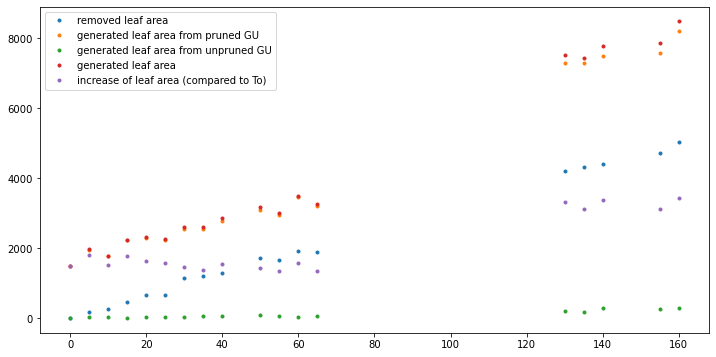

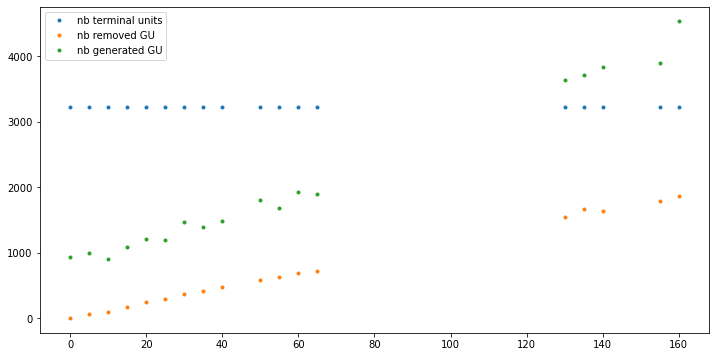

In [105]:
plot_cutrange(cuts76, las76, units76)


In [ ]:

cuts, las, units = process_range(g,(0,300,5), cuttype = (1,0,0), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)

In [ ]:
cuts, las, units = process_range(g,(0,300,5), cuttype = (0,1,0), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)

In [ ]:
cuts, las, units = process_range(g,(0,80,2), cuttype = (0,0,1), nbtests = 1)

In [ ]:
plot_cutrange(cuts, las, units)